# <span style="color:darkblue"> Lecture 14a: Regression Trees
 </span>

<font size = "5">



<font size = "5">

Install the "graphviz" library. In the terminal:

```pip install graphviz``` (Visualize regression trees) <br>
```pip install ISLP```     (Data from Intro to Statistical Learning)

If the Graphviz is note working

``` conda install python-graphviz ```

# <span style="color:darkblue"> I. Setup Working Environment </span>


In [57]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import tree
import sklearn.model_selection as skm
from sklearn.ensemble import RandomForestRegressor as RF


# This is used to create data matrices
import patsy

# This is used to visualize regreesion trees
import graphviz

# Import content from the book "Introduction to Statistical Learning"
import ISLP


# <span style="color:darkblue"> II. Mashable Dataset </span>


<font size = "5">

Mashable is a news website, digital media platform <br> 
and entertainment company. Our goal will be to predict which articles <br>
get shared most often. We will be working with a subset of the data <br>
compiled by the following authors:

Original Article <br>
https://repositorium.sdum.uminho.pt/bitstream/1822/39169/1/main.pdf

The Kaggle data repository <br>
https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set


In [47]:
articles_train  = pd.read_csv("data_raw/ArticlesTrain.csv")
articles_test   = pd.read_csv("data_raw/ArticlesTest.csv")


<font size = "5">

Create features matrix ($X$) and labels/outcomes $(Y)$


In [48]:
# Extract all columns except "shares" (the outcome)
X_train = articles_train.drop(columns = ["shares"])
X_test  = articles_test.drop(columns = ["shares"])

# Extract shares (the outcome)
y_train = articles_train[["shares"]]
y_test = articles_test[["shares"]]

<font size = "5">

Train regression tree

- Compute $\widehat{f}(x)$
- Random state sets a seed for tie breaking

In [73]:
tree_model = DTR(max_depth=3,random_state = 0) 
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

<font size = "5">

Evaluate out-of-sample mean squared error (MSE)

- $\mathcal{I}_{train}\quad$  (training data)
- $\mathcal{I}_{test}\quad$ (test data)

$ MSE = \frac{1}{n_{test}}\sum_{i \in \mathcal{I}_{test}} (y_i - \widehat{f}(X_i))^2 $

In [67]:
# Converte y_test to array for comparison
y_test_array = (np.array(y_test))

# Compute MSE
np.mean((y_test_array- tree_model.predict(X_test))**2)

0.7286472382489197

<font size = "5">

Display Tree

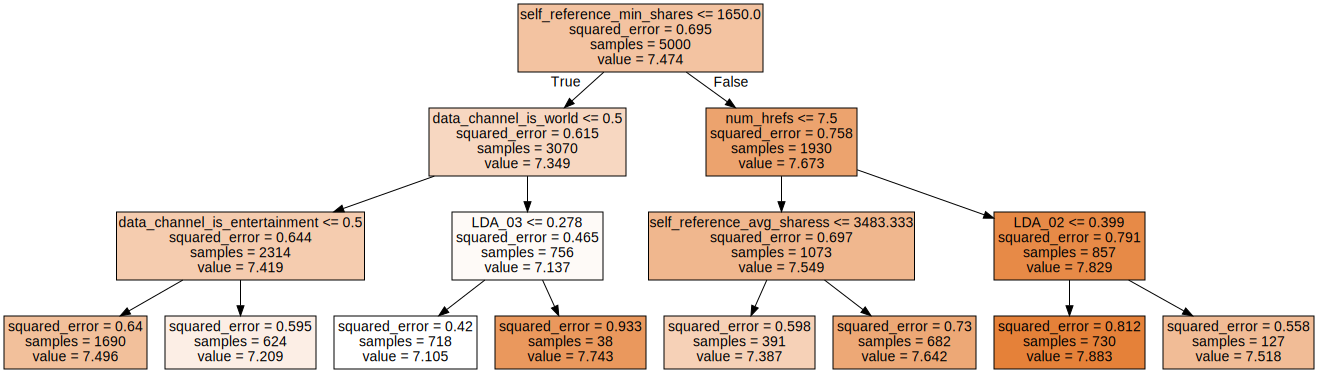

In [71]:
# Can add custom names in "feature_names"
# "filled = True" shows colors
format_tree = tree.export_graphviz(decision_tree = tree_model,
                                   feature_names=X_train.columns.values,
                                   filled=True)

graphviz.Source(format_tree)

<font size = "5">

Cost Complexity Pruning (CCP)

- Depends on a tuning parameter (ccp)
- We split training data into folds to compute the <br>
optimal CCP parameter


In [68]:
ccp_path = tree_model.cost_complexity_pruning_path(X_train, y_train) 

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10) 

grid = skm.GridSearchCV(tree_model,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold, 
                        scoring='neg_mean_squared_error')

G = grid.fit(X_train, y_train)

In [54]:
pruned_tree = grid.best_estimator_
np.mean((np.array(y_test) - pruned_tree.predict(X_test))**2)

0.7286472382489169

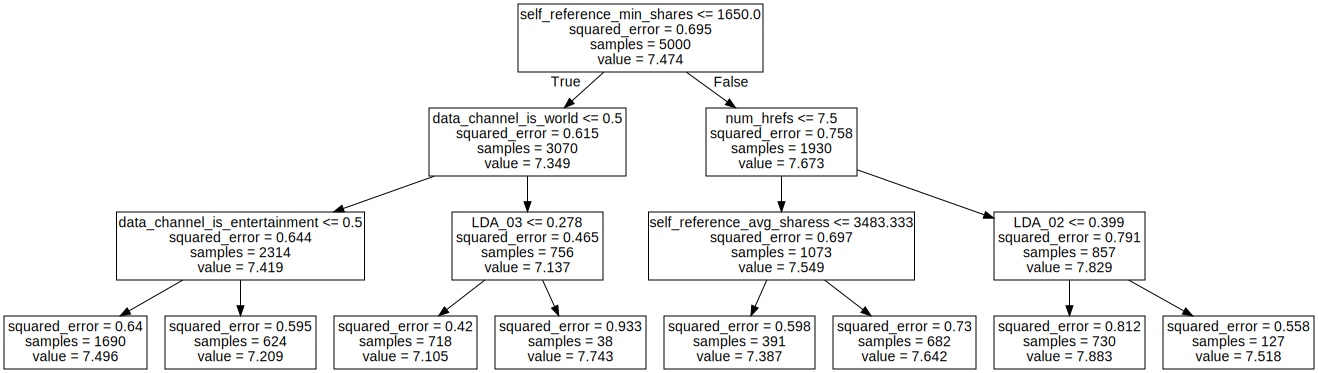

In [55]:
format_tree = tree.export_graphviz(decision_tree = pruned_tree,
                                   feature_names=X_train.columns.values)

graphviz.Source(format_tree)

# <span style="color:darkblue"> IV. Exercises </span>


<font size = "5">

Try it yourself!

For this exercises we will be working with a <br>
A data set containing housing values in 506 suburbs of Boston

In [59]:
Boston =  ISLP.load_data("Boston")

<font size = "5">

(a) Run a regression tree to predict the "crim" (crime) variable <br>
using all other neighborhood information, prune the tree, <br>
and report out-of-sample MSE

- Use two different tree depths. How does this affect <br>
out-of-sample performance?

In [60]:
# Write your own code






<font size = "5">

(b) Run a linear regression using the same data. <br>
Which method has the lowest out-of-sample MSE? 

In [61]:
# Write your own code





